In [3]:
options(warn=-1)

In [4]:
library(PerformanceAnalytics)
library(rgdal)
library(plyr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(caret)
library(stringr)
library(DT)
library(leaflet)
library(plotly)

In [5]:
fillColor = "#7ABDFF"
fillColorRoom = "0FF1CB"
mycolors <- c("#771C19", "#AA3929", "#8E9CA3", "#556670", "#000000",
              "#E25033", "#F27314", "#F8A31B", "#E2C59F", "#B6C5CC",
              "#99CCCC","#FFCC99")

In [6]:
melData= read.csv("housing_final.csv")

In [7]:
head(melData)

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Propertycount,Year,Incidents.Recorded,distance_to_train_station,travel_min_to_CBD,train_station_name,Month,Weekday,Year_Month,Year.Month
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,...,4019,2016,994,350.781,13.23529,Victoria Park Railway Station (Abbotsford),Dec,Saturday,2016-12,2016/12
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,...,4019,2016,994,289.148,10.12500,North Richmond Railway Station (Richmond),Feb,Thursday,2016-02,2016/02
Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2.5,3067,...,4019,2016,994,299.261,12.23529,Collingwood Railway Station (Abbotsford),Jun,Saturday,2016-06,2016/06
Abbotsford,129 Charles St,2,h,941000,S,Jellis,2016-05-07,2.5,3067,...,4019,2016,994,144.364,12.23529,Collingwood Railway Station (Abbotsford),May,Saturday,2016-05,2016/05
Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,2016-05-07,2.5,3067,...,4019,2016,994,542.509,12.23529,Collingwood Railway Station (Abbotsford),May,Saturday,2016-05,2016/05
Abbotsford,98 Charles St,2,h,1636000,S,Nelson,2016-10-08,2.5,3067,...,4019,2016,994,219.075,12.23529,Collingwood Railway Station (Abbotsford),Oct,Saturday,2016-10,2016/10


## Top 10 number of houses sell suburbs and average price suburbs

In [8]:
suburbData = melData %>% group_by(Suburb) %>% 
  summarise(AvgPricePerSuburb = round(median(Price),0)) %>%
  arrange(desc(AvgPricePerSuburb))

suburbData$AvgPriceSuburb = scales::dollar(suburbData$AvgPricePerSuburb)
suburbDataFull =suburbData %>% select(Suburb,AvgPriceSuburb)

In [9]:
datatable(head(suburbDataFull,n =100))

HTML widgets cannot be represented in plain text (need html)

In [10]:
suburbData = suburbData[0:9,]

top10sub_by_averprice$Average2 = scales::dollar(top10sub_by_averprice$Average)
top_10_suburbs_plot<-ggplot(top10sub_by_averprice, aes(reorder(Suburb, Average), Average, fill = Regionname,text = paste("Suburb: ", Suburb,
                                                                                                       "<br>price: $", Average,
                                                                                                      "<br>Regionname: $", Regionname)))+
  geom_bar(stat = "identity")+
  theme(legend.background = element_rect(fill="lightblue",
                                         size=0.3, linetype="solid", 
                                         colour ="darkblue"))+
  labs(x = "Suburb", y = "Average Price of House",
       title = "Top 10 Suburbs by the Average Price of House")+
  geom_text(aes(x = Suburb, y = 1, label = paste0("                     (",Average2,")",sep="")),
            hjust=0, vjust=.5, size = 4, colour = 'black',
            fontface = 'bold') +
  scale_y_continuous(breaks = c(seq(1000000,6000000,1000000)),
                     labels = c(paste("$", 1:6, "m", sep = "")))+
  coord_flip()

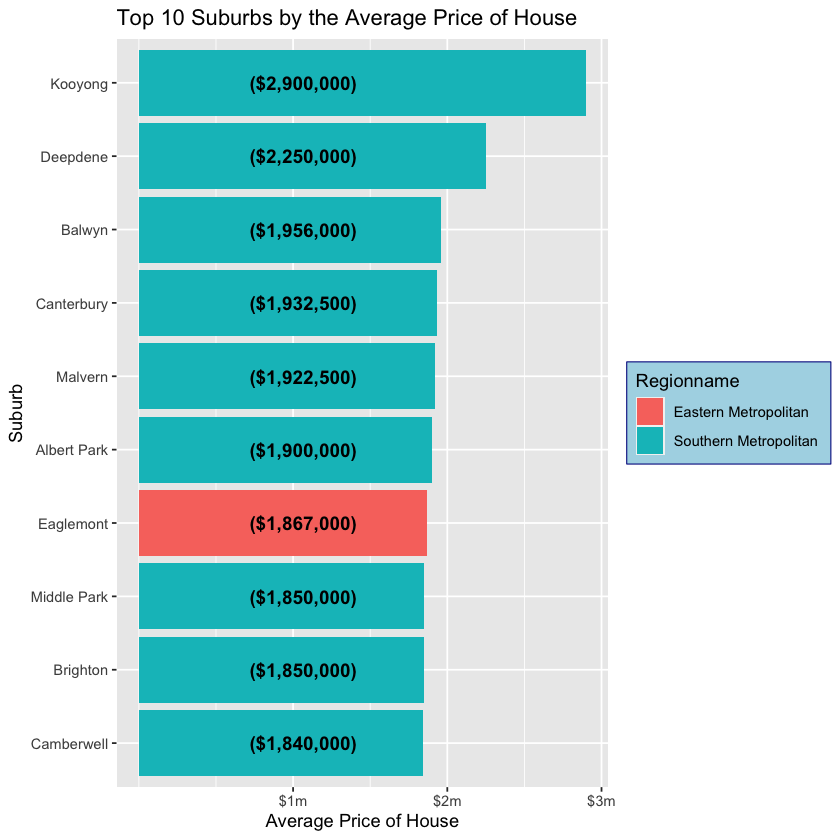

In [11]:
top_10_suburbs_plot

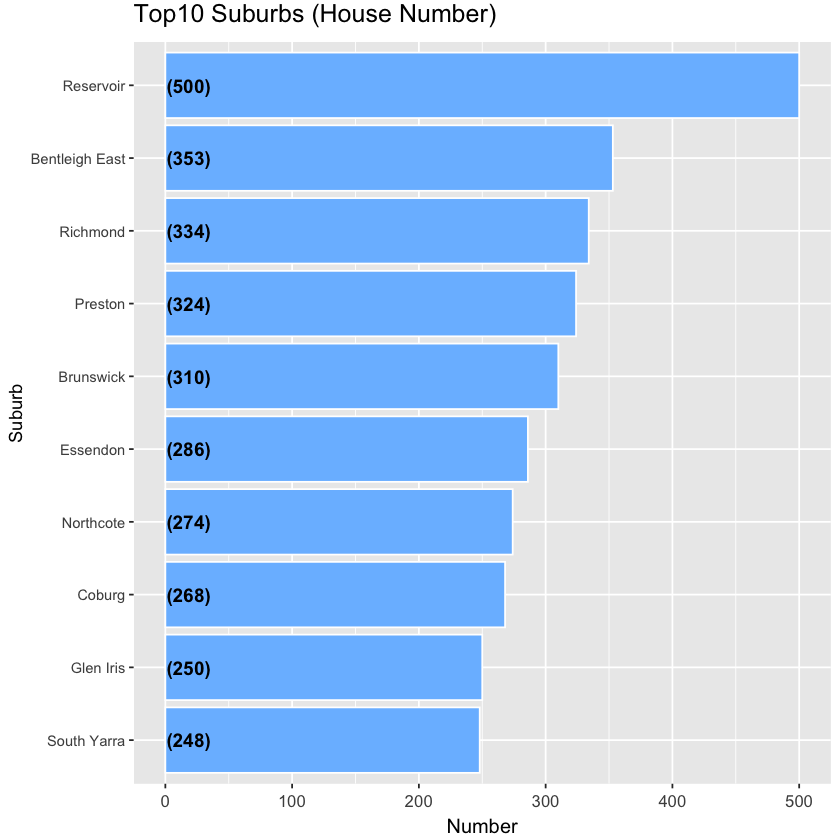

In [12]:
top10sub_by_houses <- melData %>% group_by(Suburb) %>%
  summarise(Number = n()) %>% arrange(desc(Number)) %>%
  head(10)

ggplot(top10sub_by_houses, aes(reorder(Suburb, Number), Number, fill = Suburb))+
  geom_bar(stat = "identity",colour="white", fill = fillColor)+
  mytheme2+
  theme(legend.position = "none")+
  geom_text(aes(x = Suburb, y = 1, label = paste0("(",Number,")",sep="")),
            hjust=0, vjust=.5, size = 4, colour = 'black',
            fontface = 'bold') +
  labs(x = "Suburb", y = "Number",
       title = "Top10 Suburbs (House Number) ")+
  coord_flip()

## The distribution of the house price in Top 10 suburb

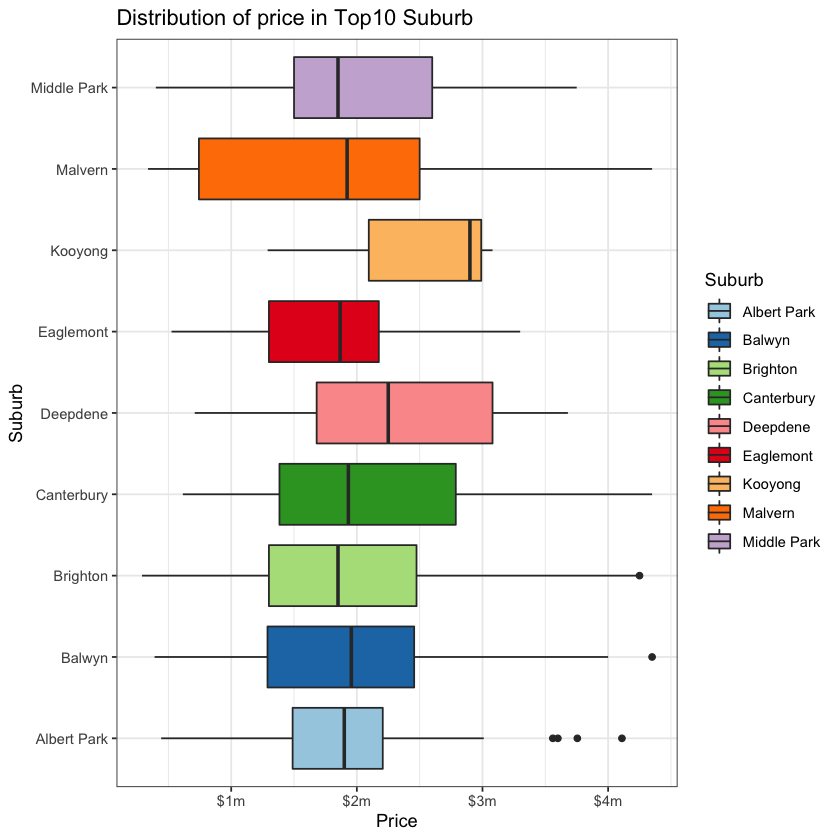

In [13]:
TopSuburbData = inner_join(melData,suburbData,by = "Suburb")

TopSuburbData = TopSuburbData %>% arrange(desc(AvgPricePerSuburb))

ggplot(TopSuburbData, aes(x = Suburb,y = Price)) +
  geom_boxplot(aes(fill=as.factor(Suburb))) +
  labs(x = 'Suburb', y = 'Price', title = 'Distribution of price in Top10 Suburb') +
  coord_flip() + 
  scale_fill_brewer(palette="Paired",name="Suburb")+
  scale_y_continuous(breaks = c(seq(1000000,6000000,1000000)),
                     labels = c(paste("$", 1:6, "m", sep = "")))+
  theme_bw()

## Price Trend from 2016 -2018:

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


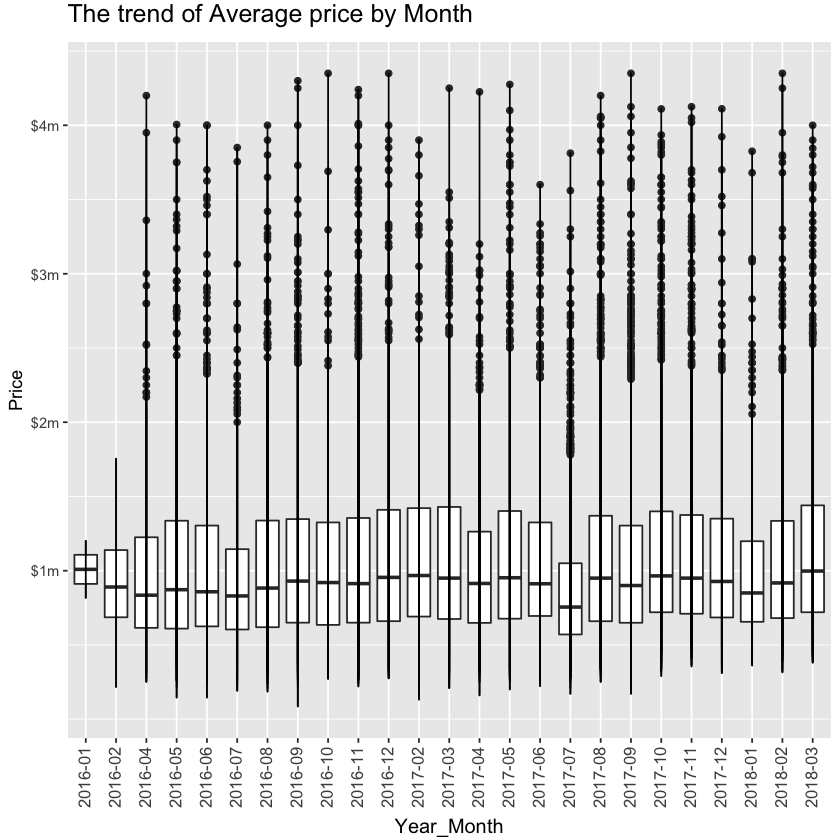

In [20]:
Price_Date <- melData[c("Suburb","Price","Year_Month")]
averPrice_date <- Price_Date %>% group_by(Year_Month) %>%
  summarise(Average = sum(Price)/n())

ggplot(Price_Date, aes(Year_Month, Price))+
  geom_boxplot()+
  geom_line()+
  ylim(0,3000000)+mytheme2+
  labs(y = "Price", title = "The trend of Average price by Month")+
  scale_y_continuous(breaks = c(seq(1000000,6000000,1000000)),
                     labels = c(paste("$", 1:6, "m", sep = "")))+
  theme(axis.text.x=element_text(angle=90, hjust=1)) 

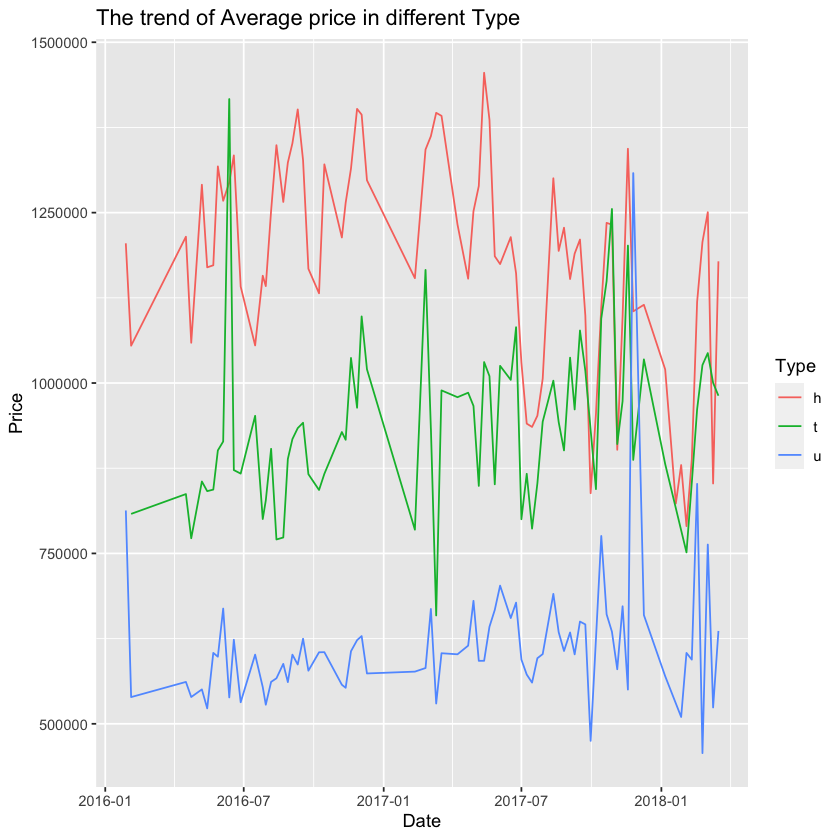

In [15]:
Type_h = melData
Type_h$Date <- as_date(Type_h$Date)
Type_hPrice_Date <- Type_h[c("Suburb","Price","Date","Type")] 
Type_haverPrice_date <- Type_hPrice_Date %>% group_by(Date,Type) %>%
  summarise(Average = sum(Price)/n())
Type_u = melData %>% filter(Type == 'u')
Type_t = melData %>% filter(Type == 't')

ggplot(Type_haverPrice_date, aes(Date, Average, color=Type))+
  geom_line()+
  labs(y = "Price", title = "The trend of Average price in different Type")

## Distance/ Average time to CBD Vs. Price:

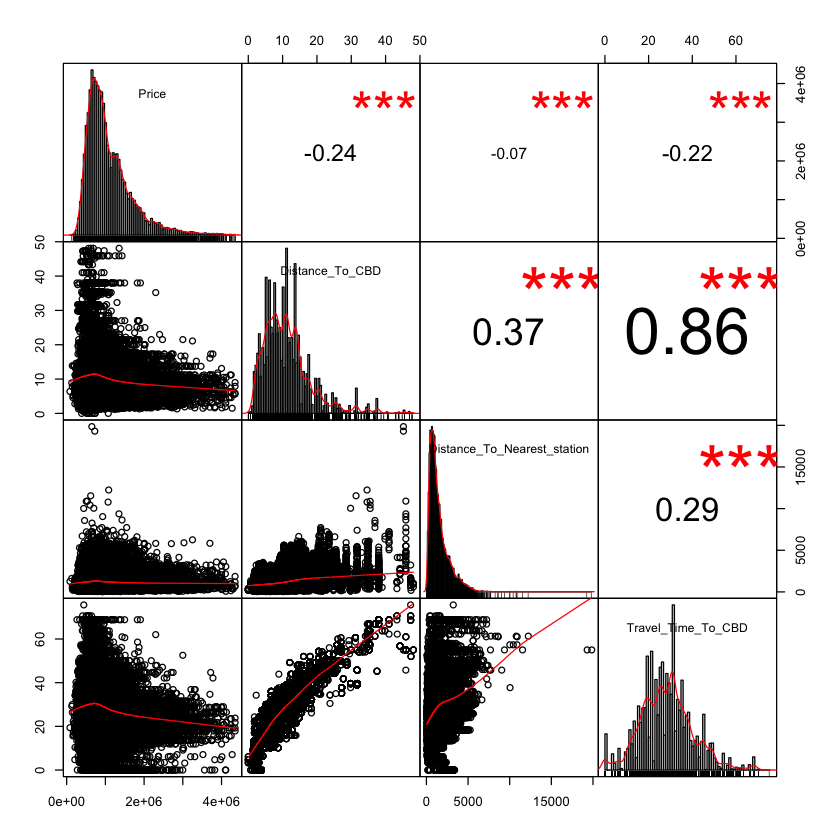

In [16]:
cor_Date <- melData[c("Price","Distance","distance_to_train_station","travel_min_to_CBD")]
names(cor_Date)[2] = "Distance_To_CBD"
names(cor_Date)[3] = "Distance_To_Nearest_station"
names(cor_Date)[4] = "Travel_Time_To_CBD"
chart.Correlation(cor_Date, histogram=TRUE, pch=19)

`geom_smooth()` using formula 'y ~ x'


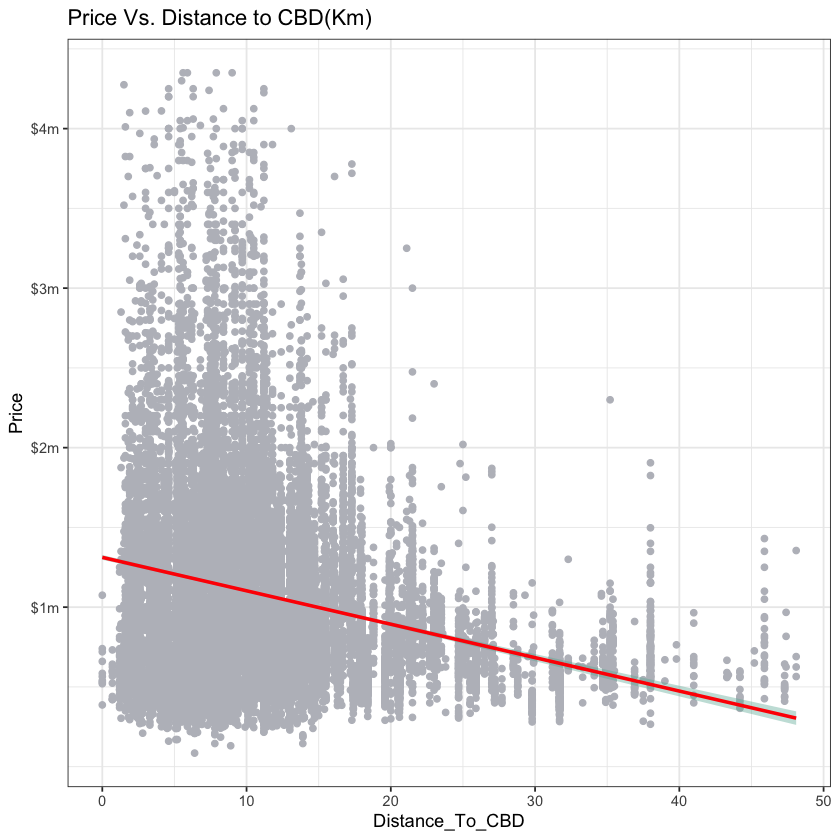

In [17]:
ggplot(cor_Date, aes(x=Distance_To_CBD, y=Price)) +
  geom_point(color="#bbbdc4") +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  scale_y_continuous(breaks = c(seq(1000000,6000000,1000000)),
                     labels = c(paste("$", 1:6, "m", sep = "")))+
  labs(y = "Price", title = "Price Vs. Distance to CBD(Km)")+
  theme_bw()

`geom_smooth()` using formula 'y ~ x'


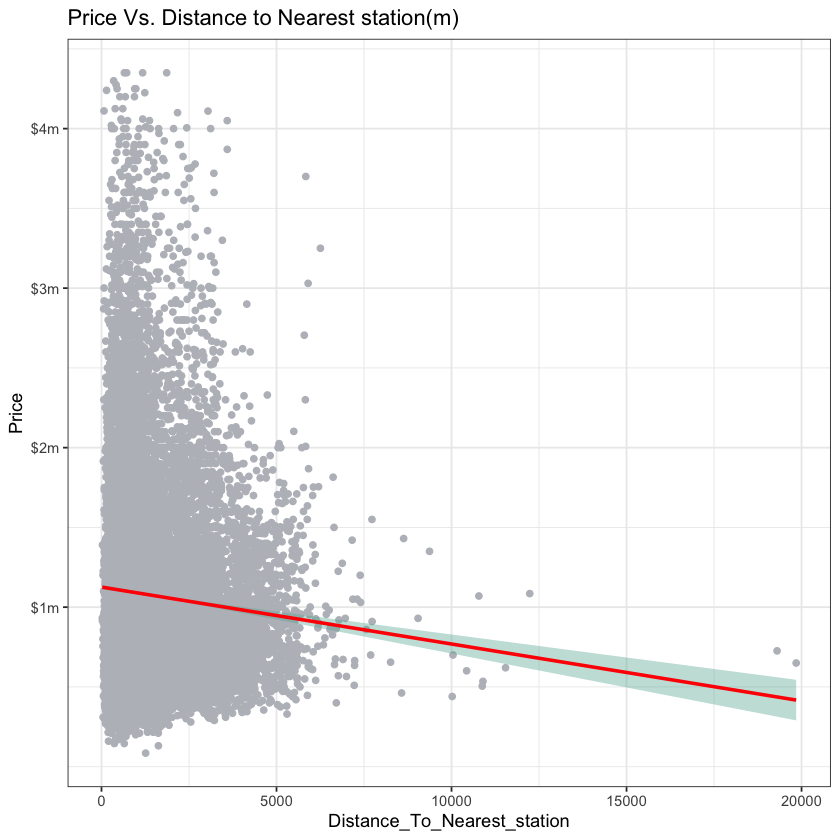

In [18]:
ggplot(cor_Date, aes(x=Distance_To_Nearest_station, y=Price)) +
  geom_point(color="#bbbdc4") +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  scale_y_continuous(breaks = c(seq(1000000,6000000,1000000)),
                     labels = c(paste("$", 1:6, "m", sep = "")))+
  labs(y = "Price", title = "Price Vs. Distance to Nearest station(m)")+
  theme_bw()

`geom_smooth()` using formula 'y ~ x'


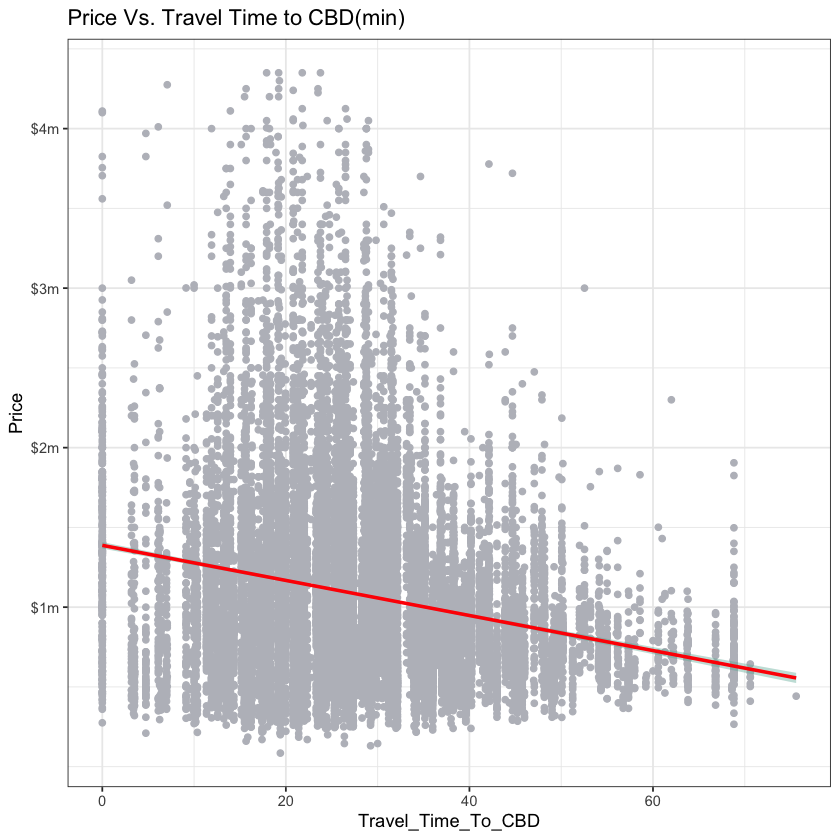

In [19]:
ggplot(cor_Date, aes(x=Travel_Time_To_CBD, y=Price)) +
  geom_point(color="#bbbdc4") +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  scale_y_continuous(breaks = c(seq(1000000,6000000,1000000)),
                     labels = c(paste("$", 1:6, "m", sep = "")))+
  labs(y = "Price", title = "Price Vs. Travel Time to CBD(min)")+
  theme_bw()